# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from iminuit import Minuit
import iminuit

In [3]:
iminuit.__version__

'2.2.0'

In [4]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [5]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [6]:
filename_logbook='logbooks/auxtellogbook_2021_v1.csv'

In [7]:
df=pd.read_csv(filename_logbook)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,exposure,focus,seeing,pressure,temperature,humidity,windspd
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,90.0,-0.034843,NaN,743.10,10.3,51.0,9.3
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,90.0,0.000000,NaN,742.80,10.4,45.0,9.9
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,6.0,0.000000,NaN,742.30,8.8,53.0,7.3
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,6.0,0.000000,NaN,742.25,8.7,55.0,6.7


# Selection of input file

In [10]:
dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [11]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [12]:
#filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits' reconstruit à moitié
#filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'
#filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' BOUGE
#filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' BOUGE
#filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' BOUGE
#filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BOUGE
#filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BOUGE
#filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
#filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits' GOOD
#filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' BAD FOCUS
#filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' BAD FOCUS

In [13]:
filename_image

'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits'

In [14]:
file_target(filename_image)
    

['HD60753']

In [15]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs/"
guess = [250,2600]
disperser_label = "holo4_003"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [16]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [17]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [18]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [19]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

2021-03-31 18:56:19  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.389962490381906 but average of self.read_out_noise is 8.5.


## Show relevant parameters

In [20]:
parameters.OBS_NAME

'AUXTEL'

In [21]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [22]:
parameters.DISTANCE2CCD

174.9980010986328

In [23]:
parameters.DISTANCE2CCD=200.0

In [24]:
parameters.LAMBDA_MIN 

300

In [25]:
parameters.LAMBDA_MAX 

1100

In [26]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures"

In [27]:
image.filter_label

''

In [28]:
image.header["FILTER"]

'empty_1'

# Plot image and find the target position

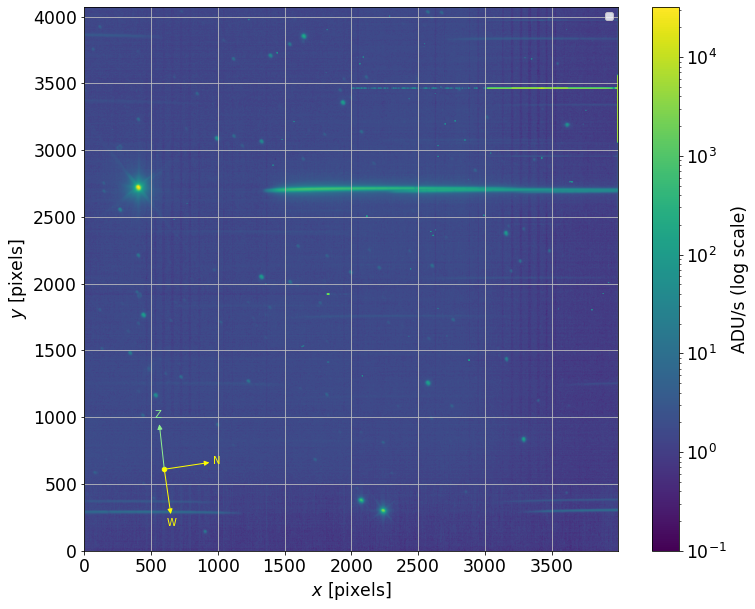

In [29]:
image.plot_image(figsize=(12, 10),scale="log")

In [30]:
alert False

SyntaxError: invalid syntax (<ipython-input-30-0039b9705ac8>, line 1)

2021-03-31 18:57:13  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- ------------------- -------------------
    4.870247129600533 0.01468500973178779 0.02774951944235044
2021-03-31 18:57:15  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 10 iterations because the relative change of cost is below ftol=1.25e-05.


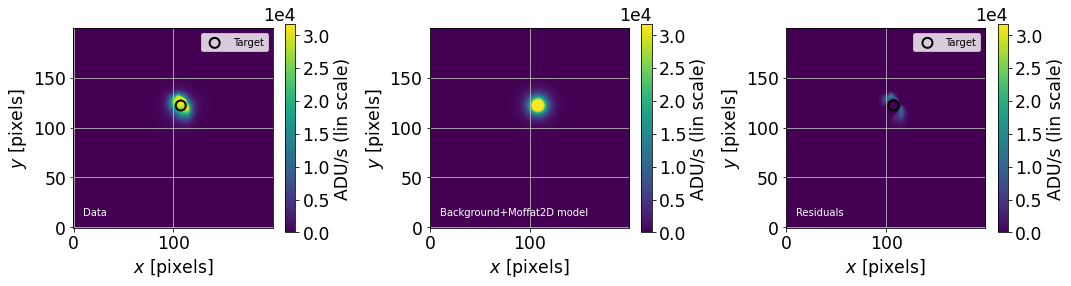

2021-03-31 18:57:16  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=5e-05.


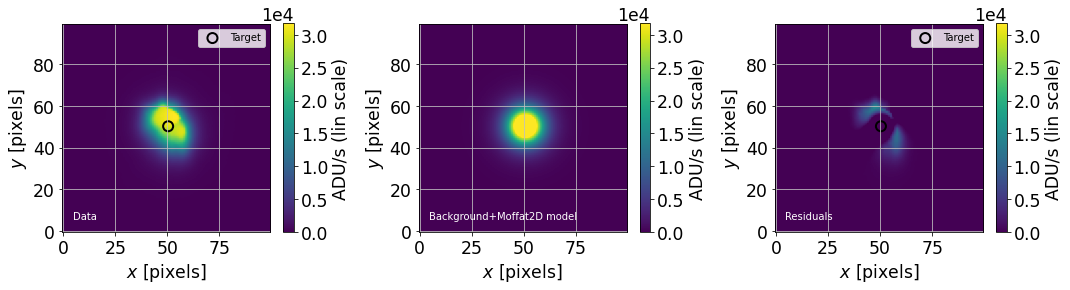

In [31]:
#guess = [2000, 2800]
guess = [400, 2700] # filename_image=df['file'][37] : Cor_holo4_003_empty_HD60753_2021-02-18_583.fits'
#guess = [300, 2300] #filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#guess = [300, 2500] #filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#guess = [300, 2500] #filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#guess = [300, 2500]  #filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#guess = [300, 2500]  #filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits'  GOOD
#guess = [300, 2500]  #filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#guess = [300, 2500]  #filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#guess = [300, 2600]  #filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#guess = [300, 2600]  #filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' TOO BAD FOCUS
#guess = [300, 2600]  #filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' TOO BAD FOCUS

parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [32]:
print(x1,y1)

407.39781050726026 2722.2164076696595


# Go for spectrum reconstruction

2021-03-31 18:57:23  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-03-31 18:57:23  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_empty_HD60753_2021-02-18_583.fits...
2021-03-31 18:57:23  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-03-31 18:57:23  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-03-31 18:57:23  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-03-31 18:57:23  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-03-31 18:57:27  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.389962490381906 but average of self.read_out_noise is 8.5.
2021-03-31 18:57:28  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2
             "h:m:s"       "d:m:s"    ...    mas / yr        deg                
--------- ------------- ------------- ... ------------- -------------- ---------
HD  60753 07 33 27.3190 -50 35 

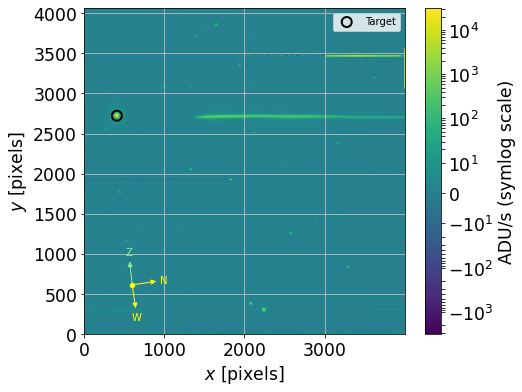

2021-03-31 18:57:32  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 407.39781051 2722.21640767]...
2021-03-31 18:57:32  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_empty_HD60753_2021-02-18_583_wcs/Cor_holo4_003_empty_HD60753_2021-02-18_583.wcs available, use 2D fit to find target pixel position.
2021-03-31 18:57:32  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                  c0_1        
    ----------------- --------------------- ---------------------
    9.397012278270282 0.0011836617703902016 -0.004818570488337782
2021-03-31 18:57:32  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 10 iterations because the relative change of cost is below ftol=1.25e-05.


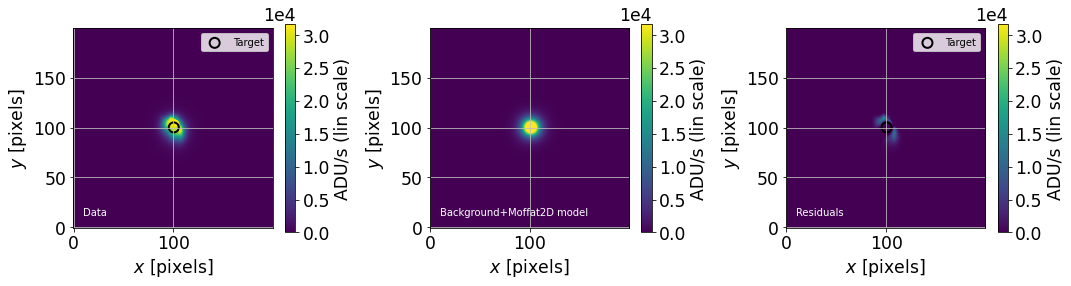

2021-03-31 18:57:33  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=5e-05.


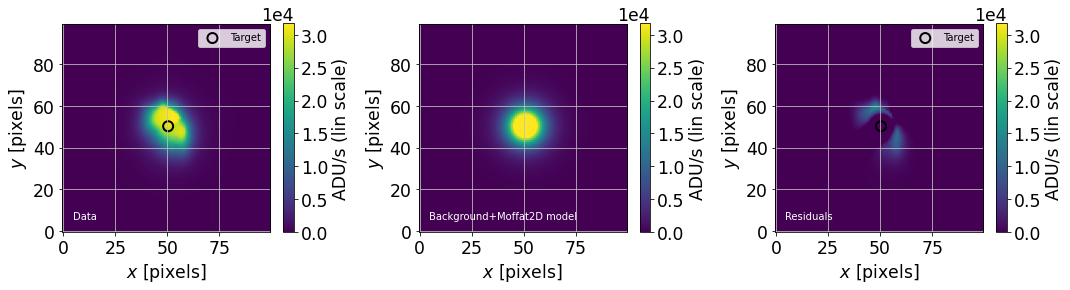

2021-03-31 18:57:34  Image      find_target          INFO   
	X,Y target position in pixels: 407.398,2722.219


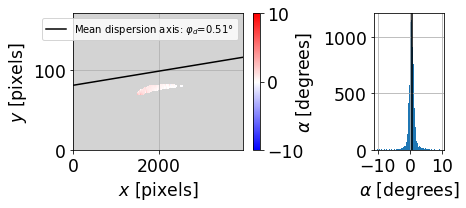

2021-03-31 18:57:36  Image      turn_image           INFO   
	Rotate the image with angle theta=0.51 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


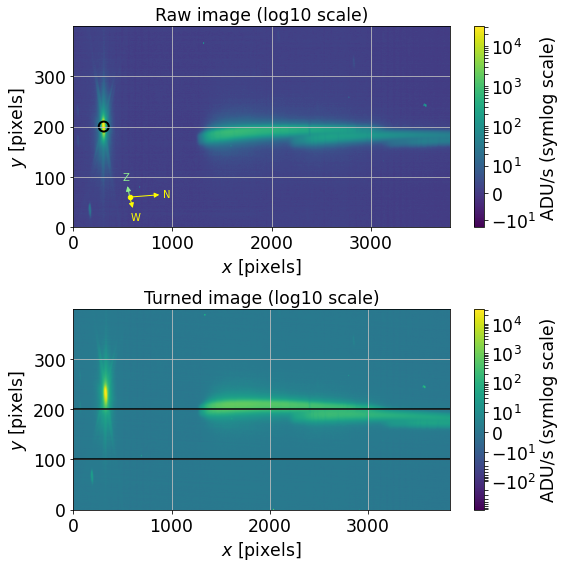

2021-03-31 18:57:47  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-03-31 18:57:47  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- ------------------- -------------------
    40.15096619523112 0.11158920190576241 0.04398453777247199
2021-03-31 18:57:47  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 11 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


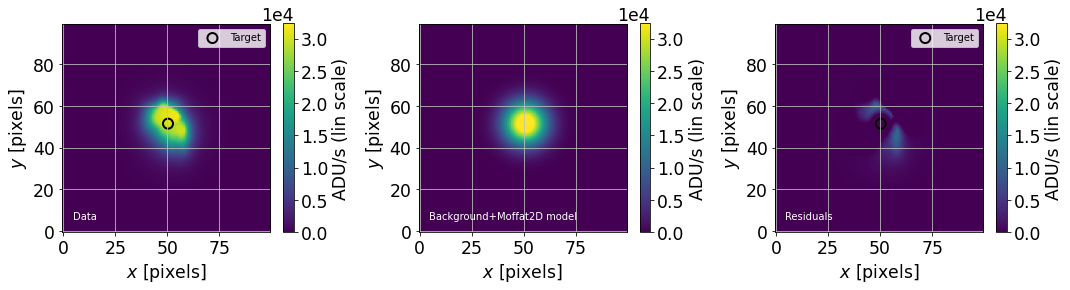

2021-03-31 18:57:48  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=0.0002.


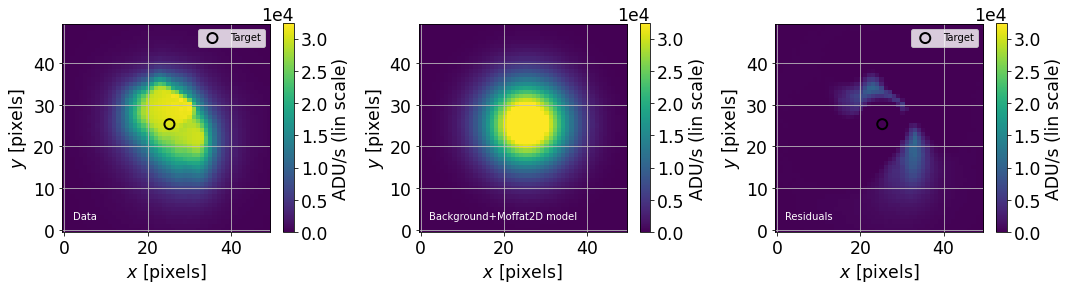

2021-03-31 18:57:49  Image      find_target          INFO   
	X,Y target position in pixels: 431.267,2754.362
2021-03-31 18:57:49  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-03-31 18:57:49  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-03-31 18:57:49  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1251:3479,2574:2934] (size (2228, 360))


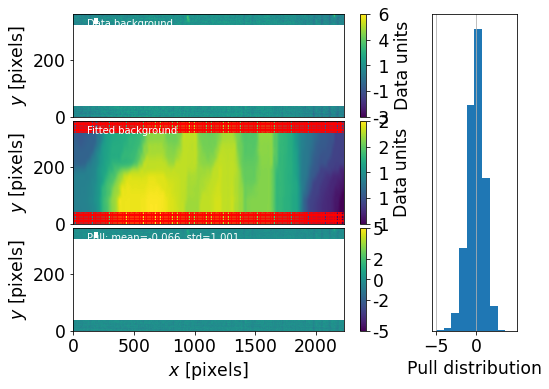

2021-03-31 18:57:53  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/chromaticpsf.py:764: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax[0].set_yscale('symlog', linthresh=10)


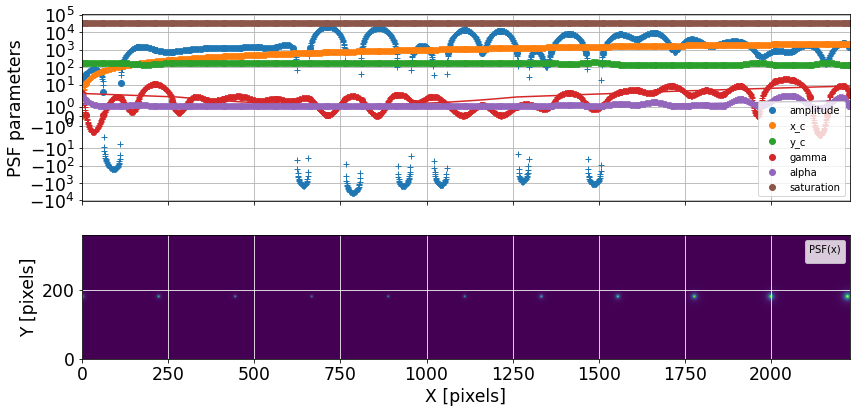

2021-03-31 18:58:29  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.1282e+07 initial chisq_red=126.6
		 Line search: alpha_min=0.11 iter=5 funcalls=9
	Parameter shifts: [-0.08053718 -0.11768669 -0.13133523 -0.35257385 -0.33944002 -0.78363291
 -0.23993807 -0.03353254 -0.23608552]
	New parameters: [-21.70084027 -31.81726659 -31.78158118   2.63802804   2.70600023
   3.90184115   1.01021052   0.15871933   0.04071908]
	Final cost=1.1282e+07 final chisq_red=126.6 computed in 3.11s
2021-03-31 18:58:32  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=1.1282e+07 initial chisq_red=126.6
		 Line search: alpha_min=0.0934 iter=4 funcalls=8
	Parameter shifts: [-0.08850089 -0.13158933 -0.15615016  0.13885339  0.06015638  0.13903009
  0.12978076 -0.23737957  0.10316802]
	New parameters: [-21.78934116 -31.94885591 -31.93773134   2.77688143   2.7661566
   4.04087123   1.13999128  -0.07866023   0.1438871 ]
	Final cost=1.1278e+07 final chisq

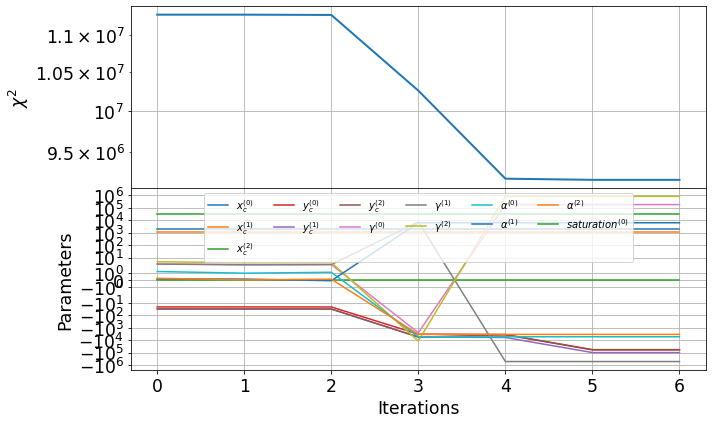

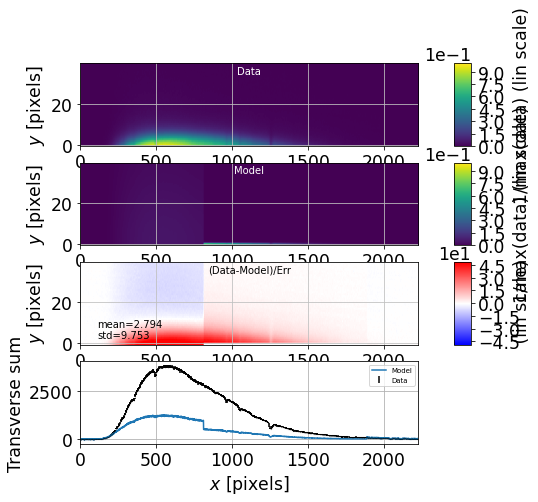

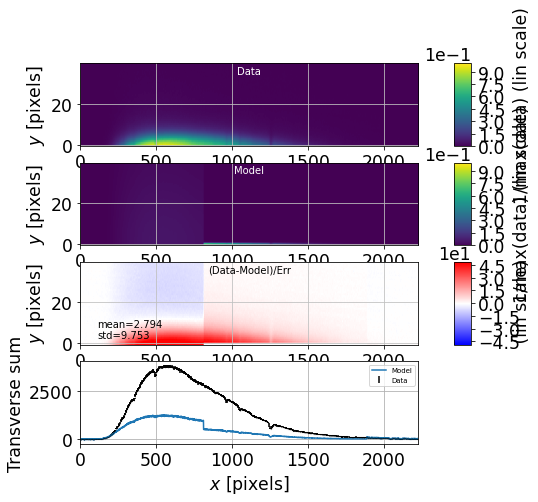

2021-03-31 18:58:53  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c   y_c ...          Dy         Dy_disp_axis
------------------- ------ --- ... ------------------- ------------
-46.681899325534886    0.0 0.0 ... -180.36214415399218          0.0
 -45.12443442104874    1.0 0.0 ... -180.36214415399218          0.0
 -56.55992696599903    2.0 0.0 ... -180.36214415399218          0.0
-29.991802880475063    3.0 0.0 ... -180.36214415399218          0.0
-43.843154006705056    4.0 0.0 ... -180.36214415399218          0.0
  -56.5975302593316    5.0 0.0 ... -180.36214415399218          0.0
 -16.23497722654519    6.0 0.0 ... -180.36214415399218          0.0
-120.87769210719013    7.0 0.0 ... -180.36214415399218          0.0
 -105.0899232711039    8.0 0.0 ... -180.36214415399218          0.0
  -36.1379607079421    9.0 0.0 ... -180.36214415399218          0.0
                ...    ... ... ...                 ...

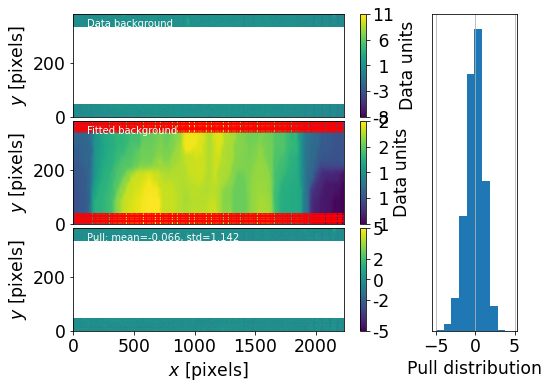

2021-03-31 18:58:58  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.464 ADU/s, RMS=1.742 ADU/s.
2021-03-31 18:58:58  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1226:3454,2549:2930] (size (2228, 381))
	New target position in spectrogram frame: [-818.6015268758508, 173.21901705478422]


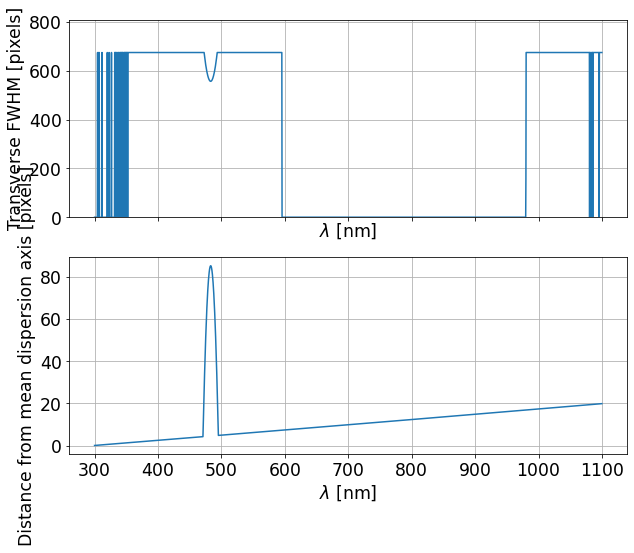

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


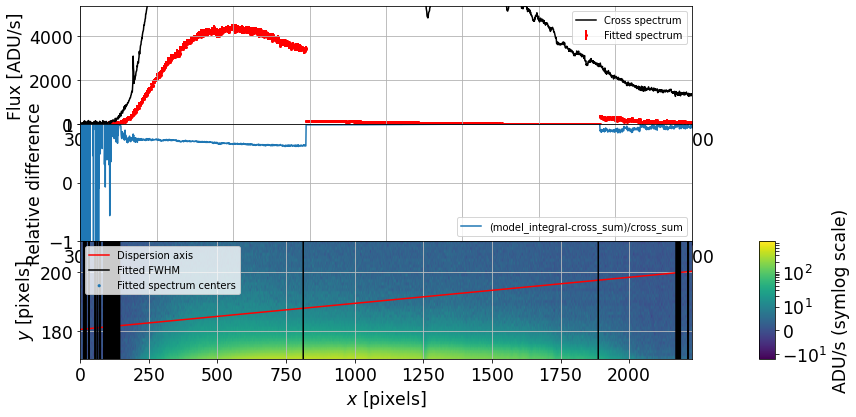

2021-03-31 18:59:01  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


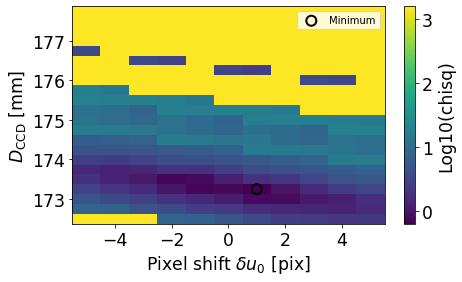

spectrum/calibrate_spectrum::pixel_shift_step= 1.0
spectrum/calibrate_spectrum::parameters.DISTANCE2CCD_ERR= 0.5
spectrum/calibrate_spectrum::error= (0.5, 1.0)
spectrum/calibrate_spectrum::start= [173.2480011   1.       ]


2021-03-31 18:59:46  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: 0.680pix
	D = 173.243 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -3.5 sigma shift)
2021-03-31 18:59:46  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-03-31 18:59:46  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/Cor_holo4_003_empty_HD60753_2021-02-18_583_spectrum.fits
2021-03-31 18:59:46  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs/Cor_holo4_003_empty_HD60753_2021-02-18_583_spectrogram.fits


   Line   Tabulated  Detected    Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm         nm     ...  reduced       nm          nm     
--------- --------- --------- ----------- ... --------- ----------- ------------
$H\alpha$ 656.34265 655.77423  -0.5684316 ... 0.7542429  0.37683165    0.3640806
 $O_2(B)$   687.472 687.54486  0.07285519 ...  0.717573   0.4956722    0.5462031
              760.3 760.40106 0.101063184 ... 0.6890989     1.22184    2.6553607
    $O_2$     763.1 763.20795  0.10796574 ... 0.6890989   1.4706594    2.7582016


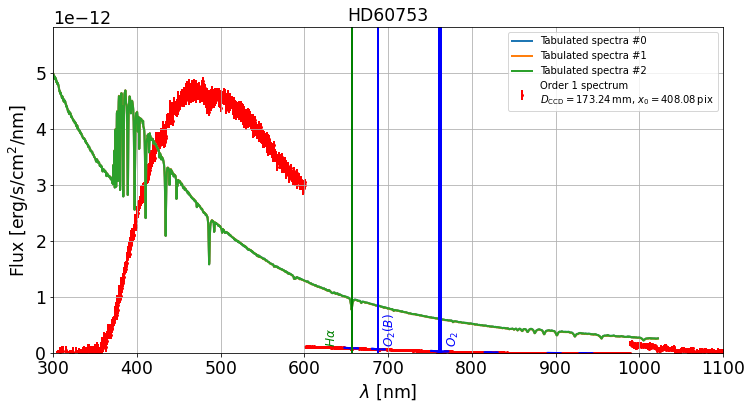

In [33]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)